In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [143]:
df = pd.read_csv('./fy24_recommended_data.csv')

In [144]:
df.head()

,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Recommended
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.9,99314,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.3,29630,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.6,16164.36,24900,36115


In [145]:
df.dtypes

Cabinet                object
Dept                   object
Program                object
Expense Category       object
FY21 Actual Expense    object
FY22 Actual Expense    object
FY23 Appropriation     object
FY24 Recommended       object
dtype: object

In [146]:
columns_to_process = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Recommended']
for col in columns_to_process:
    # Remove commas
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].replace('#Missing', '0')
    df[col] = df[col].replace(' #Missing ', '0')
    
    # Replace missing values with 0
    df[col] = df[col].fillna('0')
    
    # Convert from string to float
    df[col] = df[col].astype(float)



In [147]:
df.dtypes

Cabinet                 object
Dept                    object
Program                 object
Expense Category        object
FY21 Actual Expense    float64
FY22 Actual Expense    float64
FY23 Appropriation     float64
FY24 Recommended       float64
dtype: object

In [153]:
df

,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Recommended
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,"1,820,538.46","1,624,903.69","1,584,054.21","1,921,403.81"
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,"127,557.82","284,597.90","99,314.00","219,633.42"
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,"27,318.17","28,541.55","44,938.00","55,573.65"
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,"11,365.77","19,410.30","29,630.00","16,734.29"
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,"39,040.60","16,164.36","24,900.00","36,115.00"
...,...,...,...,...,...,...,...,...
894,Other,Housing Trust Fund,Housing Trust Fund,Other Expenses,"576,195.84","525,404.86","618,000.00","618,000.00"
895,Other,Reserve for Collective Bargaining City,Reserve for Collective Bargaining City,Personnel Services,"14,000,000.00","52,000,000.00","36,185,938.00","81,000,000.00"
896,Other,OPEB,OPEB,Other Expenses,"40,000,000.00","40,000,000.00","40,000,000.00","40,000,000.00"
897,Other,Risk Retention Reserve,Risk Retention Reserve,Other Expenses,"2,500,000.00","3,800,000.00","2,500,000.00","2,500,000.00"


In [169]:
grouped_df = df.groupby('Dept').agg({
    'FY21 Actual Expense': 'sum',
    'FY22 Actual Expense': 'sum',
    'FY23 Appropriation': 'sum',
    'FY24 Recommended': 'sum'
}).reset_index()

# Print the grouped DataFrame
(grouped_df)

,Dept,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Recommended
0,Age Strong,"3,883,951.65","4,223,184.72","6,045,809.80","7,691,770.91"
1,Annual Audit Costs,"142,850.00","708,203.00","750,000.00","750,000.00"
2,Assessing Department,"7,347,192.74","7,280,560.90","8,283,325.62","8,471,222.78"
3,Auditing Department,"3,132,301.28","3,045,162.77","3,275,482.27","3,697,095.62"
4,Black Male Advancement,0.00,0.00,"1,803,768.36","1,804,455.34"
5,Boston Center for Youth & Families,"26,904,859.72","26,063,362.83","30,439,080.00","30,035,065.71"
6,Boston Public Schools,"1,260,465,246.41","1,294,706,181.37","1,377,262,308.00","1,445,729,446.00"
7,Boston VETS,"2,607,979.46","2,556,198.90","4,716,761.39","4,793,180.41"
8,Budget Management,"2,833,401.95","2,830,719.38","3,359,699.00","3,498,640.14"
9,Central Fleet Management,"3,446,544.15","3,885,034.34","3,323,079.60","3,355,792.48"


In [170]:
pd.options.display.float_format = '{:.2f}'.format

In [171]:
bpd = grouped_df.iloc[62] 
print(bpd)

Dept                   Police Department
FY21 Actual Expense         422917499.05
FY22 Actual Expense         420411576.37
FY23 Appropriation          395907803.60
FY24 Recommended            404973192.56
Name: 62, dtype: object


In [174]:
top_20_24 = grouped_df.nlargest(20, 'FY24 Recommended')
top_20_24

,Dept,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Recommended
6,Boston Public Schools,1260465246.41,1294706181.37,1377262308.00,1445729446.00
62,Police Department,422917499.05,420411576.37,395907803.60,404973192.56
59,Pensions,292088778.00,323684235.00,353855931.00,390532774.35
10,Charter School Tuition,217698388.00,229842219.00,264498438.00,280416126.00
23,Fire Department,268959926.34,289513751.64,276902588.20,277967083.70
15,Debt Service,172304216.65,184271922.52,218157099.00,248342653.00
24,Health Insurance,210900841.50,205206595.70,217310394.00,222353329.00
66,Public Health Commission,106473529.00,114802081.00,117994237.00,125233172.40
67,Public Works Department,94152631.59,98993473.79,105955547.85,116202144.43
34,MBTA,93345107.00,94117010.00,93613189.00,95283193.00


/var/folders/y9/b9wl6f753cj75nbmcvtt0h_c0000gn/T/ipykernel_1180/439395295.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=11, fontproperties=gt_america_reg)


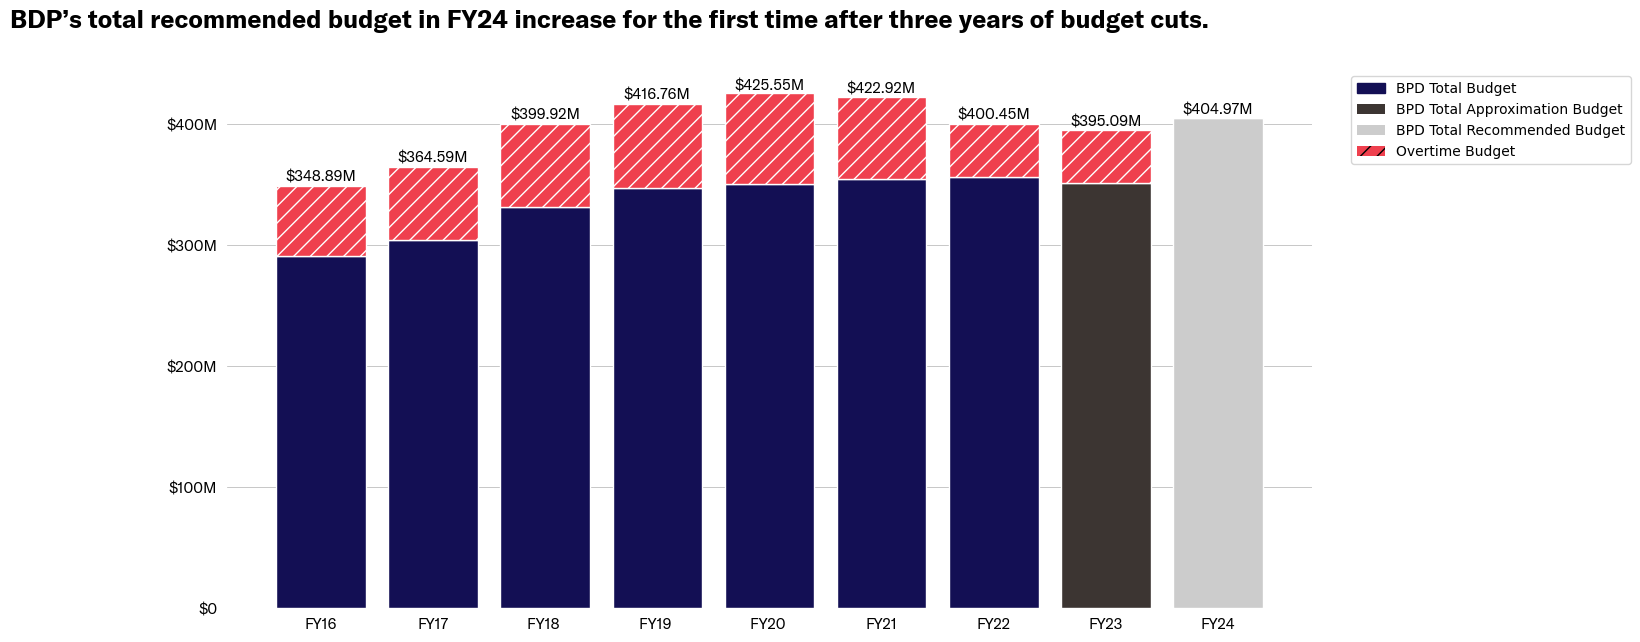

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


fig, ax = plt.subplots(figsize=(14,7))

data = [291408326.0,304278886.0,332015860.0,347002551.0,350858616.0,354698729.0,356528078.0,351171570.0,404973192.56]
labels = ['FY16','FY17','FY18 ','FY19 ','FY20 ', 'FY21', 'FY22', 'FY23','FY24']
y_axis2 = [57479518, 60315934, 67908633, 69759822, 74694594, 68218769, 43923226, 43923226,0]


data2=[348887844.0,364594820.0,399924493.0,416762373.0,425553210.0,422917498.0,400451304.0,395094796.0,404973192.56]

gt_america_reg = FontProperties(fname='GT-America-Standard-Regular.ttf')
gt_america_bold = FontProperties(fname='GT-America-Standard-Bold.ttf')


plt.grid(axis='y', linewidth=0.5)
for y in np.arange(0, 500000001, 100000000):
    if y == 50000000:
        plt.grid(axis='y', linewidth=0.3,alpha=0.2)
    else:
        plt.grid(axis='y', linewidth=0.5)


ax.bar(labels[:-2], data[:-2], color='#130F54', edgecolor='#130F54', label='BPD Total Budget')
ax.bar(labels[-2], data[-2], color='#3C3532', label='BPD Total Approximation Budget')
ax.bar(labels[-1], data[-1], color='#CCCCCC', label='BPD Total Recommended Budget')

# Add additional bars at the top
ax.bar(labels, y_axis2, bottom=data, color='#EF404E', hatch='//', label='Overtime Budget')


# Highlight bar values
# Highlight bar values
for i, v in enumerate(data2):
    if i < len(data2) - 2:
        if i in [2]:  # Middle bars
            ax.text(i, v+16**5.5, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=11, fontproperties=gt_america_reg)
        elif i in [4,5]:  # Middle bars
            ax.text(i, v+15**5.5, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=11, fontproperties=gt_america_reg)
        
        else:
            ax.text(i, v+15.57**5.55, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=11, fontproperties=gt_america_reg)
    else:
        ax.text(i, v+15**5.55, "${:,.2f}".format(v/1000000)+"M", ha='center', fontsize=11, fontproperties=gt_america_reg)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylim([0, max(data+y_axis2)*1.1])  # Adjust the y-axis limits

ax.set_yticks(np.arange(0, 400000001, 100000000))
ax.set_yticklabels(['$0', '$100M', '$200M', '$300M', '$400M'], fontsize=11, fontproperties=gt_america_reg)
ax.set_axisbelow(True)


plt.title('BDP’s total recommended budget in FY24 increase for the first time after three years of budget cuts.', 
          fontweight="bold", fontsize=18,loc='left',pad=30,x=-0.2,fontproperties=gt_america_bold)
#plt.ylabel('Annual BPD Budget (in millions)', fontsize=12)
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.0))


# Set hatch color to white
for bar in ax.get_children():
    if isinstance(bar, plt.Rectangle):
        bar.set_edgecolor('white')
ax.tick_params(axis='both', which='both', bottom=False, top=False,left=False, right=False)

ax.set_xticklabels(labels, fontsize=11, fontproperties=gt_america_reg)

plt.savefig('nd_q1_overtime.png', dpi=300, bbox_inches='tight')
plt.show()


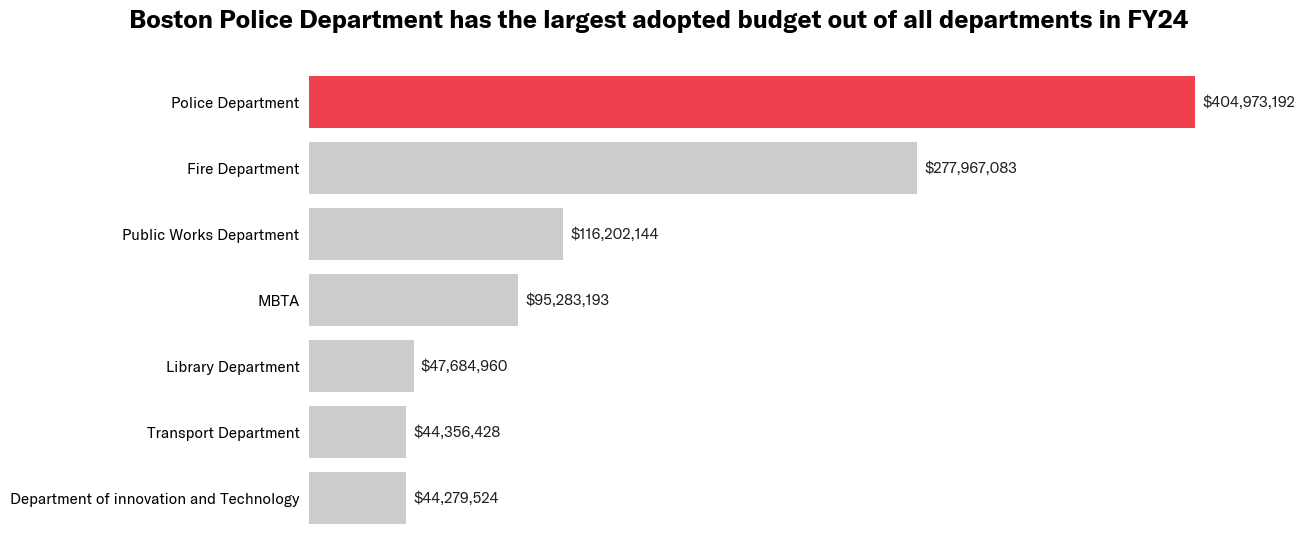

In [22]:
# this the code exluding the boston public school and highlighting BPD
import matplotlib.pyplot as plt
import numpy as np

# Data
departments = ['Police Department', 'Fire Department',  'Public Works Department', 'MBTA','Library Department','Transport Department','Department of innovation and Technology'][::-1]  # Reverse the order
fy24_rec = [404973192, 277967083, 116202144, 95283193,47684960,44356428,44279524][::-1]  # Reverse the order


gt_america_reg = FontProperties(fname='GT-America-Standard-Regular.ttf')
gt_america_bold = FontProperties(fname='GT-America-Standard-Bold.ttf')

# Combine data
years = ['FY23']
data = [fy24_rec]

# Create horizontal bar graph
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size
y_pos = np.arange(len(departments))
colors = ['#EF404E', '#CCCCCC', '#CCCCCC', '#CCCCCC','#CCCCCC','#CCCCCC','#CCCCCC'][::-1]  # Set the colors for each bar and reverse the order
ax.barh(y_pos+0.5, data[0], align='center', color=colors)
ax.set_yticks(y_pos+0.5)
ax.set_yticklabels(departments,fontsize=11,fontproperties=gt_america_reg)
ax.invert_yaxis()  # labels read top-to-bottom



plt.title(' Boston Police Department has the largest adopted budget out of all departments in FY24', 
          fontweight="bold", fontsize=18,loc='left',pad=30,x=-0.2,fontproperties=gt_america_bold)

# Change y-axis limits and labels
ax.set_ylim([0, len(departments)])
ax.set_yticklabels(departments)

# Add values to the bars
for i, v in enumerate(data[0]):
    ax.text(v + 4.5**10, i+0.5, '${:,}'.format(v), color='#231F20', fontsize=11,va='center',fontproperties=gt_america_reg)


ax.set_xticks([])

# Add vertical lines at x values
ax.set_axisbelow(True)



# Remove box around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, top=False,left=False, right=False)
plt.savefig('nd_budget_boston.png', dpi=300, bbox_inches='tight')
plt.show()


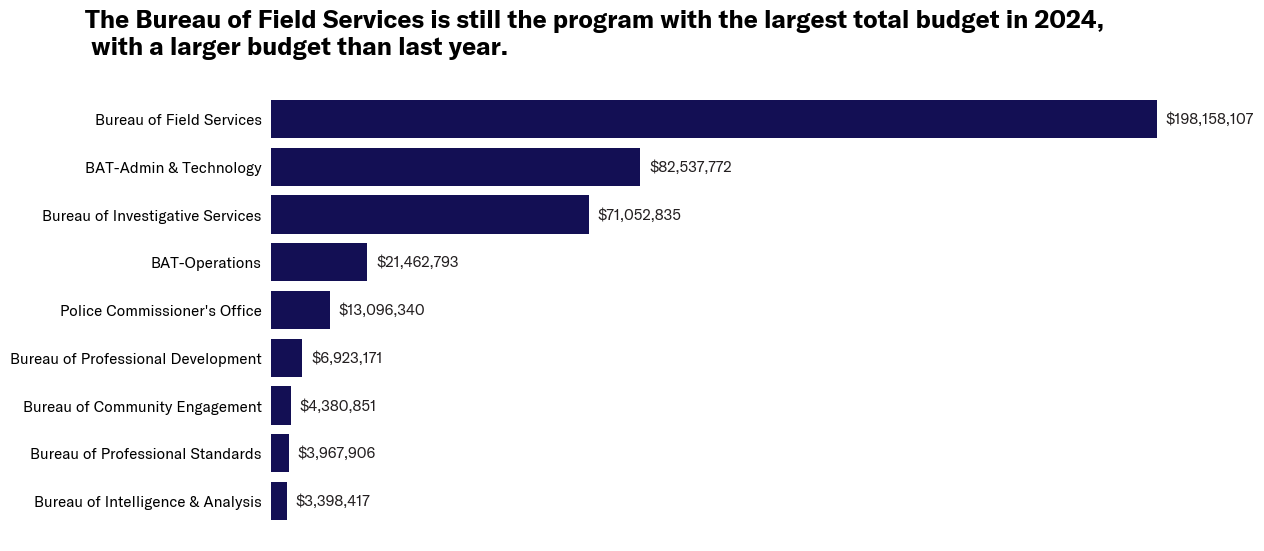

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {'Program': ['Police Commissioner\'s Office', 'Bureau of Community Engagement', 'BAT-Operations', 'BAT-Admin & Technology',
                    'Bureau of Professional Development', 'Bureau of Field Services', 'Bureau of Professional Standards', 
                    'Bureau of Investigative Services', 'Bureau of Intelligence & Analysis'],
        'FY 24 Total Budget': [13096340, 4380851, 21462793, 82537772, 6923171, 198158107, 3967906, 71052835, 3398417],
        'FY 22 Approximation': [13986246, 4221119, 19276943, 81536319, 5843281, 192750473, 4716480, 74485472, 3634970],
        'FY 21 Actual': [15882950, 4085308, 21659482, 84263703, 6521388, 198211460, 5583491, 82149151, 4560566]}

# Create dataframe
df = pd.DataFrame(data)

# Sort values by FY 23 Total Budget in descending order
df = df.sort_values(by='FY 24 Total Budget', ascending=False)

gt_america_reg = FontProperties(fname='GT-America-Standard-Regular.ttf')
gt_america_bold = FontProperties(fname='GT-America-Standard-Bold.ttf')


# Create horizontal bar graph
fig, ax = plt.subplots(figsize=(12, 6))
y_pos = range(len(df))
ax.barh(y_pos, df['FY 24 Total Budget'], align='center', color='#130F54')
ax.set_yticks(y_pos,fontsize=11,fontproperties=gt_america_bold)
ax.set_yticklabels(df['Program'],fontsize=11,fontproperties=gt_america_reg)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_title('Bureau of Field Services is the program with the highest total budget in FY23, twice as much as the second place.')

plt.title('The Bureau of Field Services is still the program with the largest total budget in 2024, \n with a larger budget than last year.', 
          fontweight="bold", fontsize=18,loc='left',pad=18,x=-0.2,fontproperties=gt_america_bold)

ax.set_xticks([])
# Add vertical lines at x values
ax.set_axisbelow(True)

plt.grid(axis='x', linewidth=1, zorder=-1,color='#EFECEA')  # Set zorder to a negative value to place the grid behind the bars


# Add values to the bars
for i, v in enumerate(df['FY 24 Total Budget']):
    ax.text(v + 5**9, i, '${:,}'.format(v), color='#231F20', va='center',fontsize=11,fontproperties=gt_america_reg)

# Remove box around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='both', which='both', bottom=False, top=False,left=False, right=False)
plt.savefig('nd_budget_bpd_program.png', dpi=300, bbox_inches='tight')
plt.show()
